In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
target = ais_example.AnnealingTarget(annealing_steps=5, batch_shape=(100,))

In [6]:
ais = ais_example.annealed_importance(target, kernel.GaussianKernel('AnnealingTarget', 'X_0', scale=1.0), moves=5)

In [7]:
annealed_points, trace, log_weight = ais()
log_probs = utils.normalize_weights(log_weight)

tensor(-2.9256)
tensor(-5.5951)
tensor(-5.1237)
tensor(-4.7133)
tensor(-4.3185)
tensor(-3.9759)


In [8]:
import matplotlib.pyplot as plt
from torch.distributions import Normal

In [9]:
sample = torch.linspace(-10, 10, 100)
sample_probs = Normal(loc=torch.zeros(1), scale=torch.ones(1)).log_prob(sample).exp()

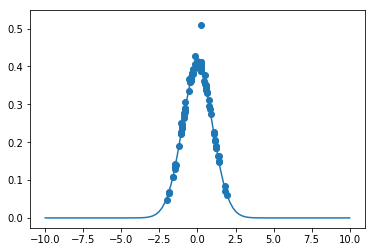

In [10]:
plt.scatter(annealed_points.detach().numpy(), log_weight.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())

In [11]:
annealed_points

tensor([ 1.2055, -1.8668,  1.8257,  0.5621, -0.8567,  0.1095, -0.4374,  0.5621,
         0.4393,  1.9479,  0.2463,  0.7673,  0.2399, -0.3028,  1.1445,  1.2488,
         0.1287, -1.4958,  0.4867, -1.0597, -0.0182, -1.8851, -0.9944, -1.0597,
         1.3225,  0.4867,  1.0891,  0.2574, -1.6011, -0.8361,  0.7673, -1.0079,
        -1.0084, -0.4676,  0.9122,  0.2574, -0.8567, -1.8668,  0.8557, -0.4858,
         0.1287,  0.6131,  0.5704,  0.0737,  0.2276,  1.3952, -0.8361,  0.0737,
         0.2574, -0.5812, -0.1642, -1.0597,  0.5779, -1.6057, -0.4374, -0.3391,
        -1.0084,  0.1287, -1.0084,  1.1445,  1.0891,  0.2399,  1.2166, -0.9033,
         0.2276, -0.8224,  0.1944,  0.2574,  0.2399, -0.5812, -2.0288, -0.4676,
        -0.4374,  0.5697,  1.2488, -1.0079, -0.3391, -0.8111, -0.8867, -1.4536,
        -0.3028,  1.3952,  1.8257, -0.1311, -1.4328, -0.0185,  1.2186,  0.2276,
         0.2399, -1.2056,  0.2574, -1.0700,  1.3952, -0.3028,  0.6131, -0.0182,
        -1.4536, -0.4676,  0.5704, -1.05

In [12]:
log_probs.exp()

tensor([0.0065, 0.0024, 0.0029, 0.0120, 0.0095, 0.0137, 0.0128, 0.0119, 0.0125,
        0.0021, 0.0134, 0.0108, 0.0134, 0.0133, 0.0070, 0.0064, 0.0137, 0.0045,
        0.0131, 0.0078, 0.0143, 0.0022, 0.0085, 0.0087, 0.0056, 0.0123, 0.0077,
        0.0137, 0.0038, 0.0098, 0.0102, 0.0082, 0.0082, 0.0124, 0.0095, 0.0138,
        0.0096, 0.0023, 0.0099, 0.0124, 0.0137, 0.0114, 0.0121, 0.0138, 0.0138,
        0.0056, 0.0097, 0.0137, 0.0176, 0.0116, 0.0148, 0.0078, 0.0118, 0.0037,
        0.0127, 0.0132, 0.0083, 0.0143, 0.0086, 0.0071, 0.0078, 0.0134, 0.0065,
        0.0091, 0.0141, 0.0100, 0.0136, 0.0135, 0.0136, 0.0127, 0.0017, 0.0124,
        0.0125, 0.0117, 0.0064, 0.0083, 0.0131, 0.0106, 0.0094, 0.0049, 0.0136,
        0.0051, 0.0025, 0.0140, 0.0048, 0.0138, 0.0064, 0.0137, 0.0142, 0.0066,
        0.0142, 0.0077, 0.0051, 0.0132, 0.0115, 0.0138, 0.0047, 0.0126, 0.0118,
        0.0077])

In [13]:
importance_points, _, resampled_weights = importance.importance(target)(t=4)
resampled_probs = utils.normalize_weights(resampled_weights)

tensor(-1.2620)


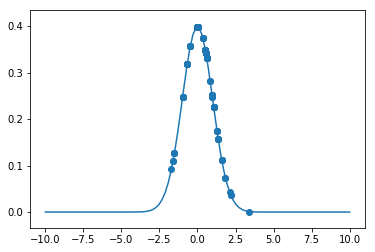

In [14]:
plt.scatter(importance_points.detach().numpy(), resampled_weights.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())